# <span style="color:darkblue"> QTM 530 Homework 5 </span>

Linchuan Zhang

11/11/2024

**Import packages and data**

In [143]:
# Import packages for machine learning functions
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import RidgeClassifier

# Import other packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [144]:
# Import data
from ucimlrepo import fetch_ucirepo 
  
iris = fetch_ucirepo(id=53) 
X = iris.data.features 
y = iris.data.targets 

# For the purpose of data description, combine X and y into one dataset.
data = pd.DataFrame(X)
data['Target'] = y

In [145]:
# Import a package for ignore warnings
import warnings
warnings.filterwarnings('ignore')

**Part 1: Description of the dataset**

1.1 Basic Features:

In [146]:
# Number of rows
len(data)

150

In [147]:
# Columns, and type of each variable
data.dtypes

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
Target           object
dtype: object

In [148]:
# Quality check: missing value
rows_with_missing = data[data.isnull().any(axis=1)]
rows_with_missing

,sepal length,sepal width,petal length,petal width,Target


As shown above, the dataset has 150 rows and 5 columns. Four of these columns have numerical data (float64), while one column has categorical data (object). Additionally, there are no missing values in this dataset.

1.2 Summary Statistics:

In [149]:
summary_stats = data.agg({
    'sepal length': ['min','mean','median','max','count'],
    'sepal width': ['min','mean','median','max','count'],
    'petal length':  ['min','mean','median','max','count'],
    'petal width':  ['min','mean','median','max','count'],
}).round(2)
summary_stats

,sepal length,sepal width,petal length,petal width
min,4.30,2.00,1.00,0.1
mean,5.84,3.05,3.76,1.2
median,5.80,3.00,4.35,1.3
max,7.90,4.40,6.90,2.5
count,150.00,150.00,150.00,150.0


In [150]:
summary_stats_group = data.groupby('Target').agg({
    'sepal length': ['mean', 'count'],
    'sepal width': ['mean', 'count'],
    'petal length':  ['mean', 'count'],
    'petal width':  ['mean', 'count'],
}).round(2)
summary_stats_group 

sepal length       sepal width       petal length        \
                        mean count        mean count         mean count   
Target                                                                    
Iris-setosa             5.01    50        3.42    50         1.46    50   
Iris-versicolor         5.94    50        2.77    50         4.26    50   
Iris-virginica          6.59    50        2.97    50         5.55    50   

                petal width        
                       mean count  
Target                             
Iris-setosa            0.24    50  
Iris-versicolor        1.33    50  
Iris-virginica         2.03    50

The dataset has three target classes: Iris-setosa, Iris-versicolor, and Iris-virginica. Each class has 50 observations, which represents 33.33% of the total observations.

Iris-setosa has the highest mean sepal width (3.42), and the smallest mean sepal length (5.01), petal length (1.46) and petal width (0.24).

Iris-versicolor  has the smallest mean sepal width (2.77).

Iris-virginica has the highest mean sepal length (6.59), petal length (5.55), and petal width (2.03).


**Part 2: Comparison of Different Machine Learning Methods**

In [ ]:
# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                   random_state=8,  
                                   test_size=0.2,  
                                   shuffle=True) 


In [ ]:
# Fit the scaler on training data
scaler = StandardScaler().fit(X_train)

# Transform both training and test data using the same scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the scoring metrics
scoring = ['accuracy', 'precision_macro', 'recall_macro']

2.1 Machine Learning Method I: SVMs

In [ ]:
model_1 = SVC(random_state=8)

# Perform cross-validation
scores_1 = cross_validate(model_1, X_train_scaled, y_train, cv=10, scoring=scoring)

# Calculate and print the mean results for each metric
results_1 = {
    'Accuracy': scores_1['test_accuracy'].mean(),
    'Precision': scores_1['test_precision_macro'].mean(),
    'Recall': scores_1['test_recall_macro'].mean()
}
results_1

{'Accuracy': 0.975,
 'Precision': 0.9755555555555556,
 'Recall': 0.9738888888888889}

In [ ]:
# Compute cross-validated error as 1 - average accuracy. 
# I can also use precision and recall to compute cross-validated error. To save space, I will just show how to compute cross-validated error with the accuracy score.
cross_validated_error_1 = 1- np.mean(scores_1['test_accuracy'])
cross_validated_error_1

0.025000000000000022

2.2.1 Machine Learning Method II: Random Forests (using default tuning parameters)

In [ ]:
model_2_default= RandomForestClassifier(random_state=8)

# Perform cross-validation
scores_2_default = cross_validate(model_2_default, X_train_scaled, y_train, cv=10, scoring=scoring)

# Calculate and print the mean results for each metric
results_2_default = {
    'Accuracy': scores_1['test_accuracy'].mean(),
    'Precision': scores_1['test_precision_macro'].mean(),
    'Recall': scores_1['test_recall_macro'].mean()
}
results_2_default

{'Accuracy': 0.975,
 'Precision': 0.9755555555555556,
 'Recall': 0.9738888888888889}

In [156]:
# Compute cross-validated error as 1 - average accuracy
cross_validated_error_2_default = 1 - np.mean(scores_2_default['test_accuracy'])
cross_validated_error_2_default

0.025000000000000133

2.2.2 Machine Learning Method II: Random Forests (not using default tuning parameters)

In [157]:
# Hyperparameter tuning for RandomForest using GridSearchCV
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 7, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=8), param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_

In [158]:
# Print the best parameters and the best cross-validation score
print(grid_search.best_params_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 10}


In [ ]:
model_2 = best_rf
scores_2 = cross_validate(model_2,X_train_scaled, y_train, cv=10, scoring=scoring)

# Calculate and print the mean results for each metric
results_2 = {
    'Accuracy': scores_2['test_accuracy'].mean(),
    'Precision': scores_2['test_precision_macro'].mean(),
    'Recall': scores_2['test_recall_macro'].mean()
}
results_2

{'Accuracy': 0.9749999999999999,
 'Precision': 0.9811111111111112,
 'Recall': 0.9722222222222221}

In [160]:
# Compute cross-validated error as 1 - average accuracy
cross_validated_error_2 = 1 - np.mean(scores_2['test_accuracy'])
cross_validated_error_2

0.025000000000000133

2.3 Machine Learning Method III: Neural Networks

In [ ]:
model_3 = MLPClassifier(random_state=8)

# Perform cross-validation
scores_3 = cross_validate(model_3, X_train_scaled, y_train, cv=10, scoring=scoring)

# Calculate and print the mean results for each metric
results_3 = {
    'Accuracy': scores_3['test_accuracy'].mean(),
    'Precision': scores_3['test_precision_macro'].mean(),
    'Recall': scores_3['test_recall_macro'].mean()
}
results_3

{'Accuracy': 0.95,
 'Precision': 0.9550000000000001,
 'Recall': 0.9505555555555556}

In [162]:
# Compute cross-validated error as 1 - average accuracy
cross_validated_error_3 = 1 - np.mean(scores_3['test_accuracy'])
cross_validated_error_3

0.050000000000000044

2.4 Machine Learning Method IV: Ridge (my own choice)

In [ ]:
model_4 = RidgeClassifier(random_state=8)

# Perform cross-validation
scores_4 = cross_validate(model_4, X_train_scaled, y_train, cv=10, scoring=scoring)

# Calculate and print the mean results for each metric
results_4 = {
    'Accuracy': scores_4['test_accuracy'].mean(),
    'Precision': scores_4['test_precision_macro'].mean(),
    'Recall': scores_4['test_recall_macro'].mean()
}
results_4

{'Accuracy': 0.875,
 'Precision': 0.8905555555555555,
 'Recall': 0.8772222222222222}

In [164]:
# Compute cross-validated error as 1 - average accuracy
cross_validated_error_4 = 1 - np.mean(scores_4['test_accuracy'])
cross_validated_error_4

0.125

2.5 Comparisons

In [ ]:
# Create a table to display results across four methods
results_df = pd.DataFrame({
    'SVMs': results_1,
    'Random Forests (Default)': results_2_default,
    'Random Forests (Optimum Tuning)': results_2,
    'Neural Networks': results_3,
    'Ridge': results_4
})

# Add another row for displaying Cross-Validated Error
results_df_add = results_df.copy()
results_df_add.loc['Cross-Validated Error'] = [cross_validated_error_1, cross_validated_error_2_default, cross_validated_error_2, cross_validated_error_3, cross_validated_error_4]

results_df_add

,SVMs,Random Forests (Default),Random Forests (Optimum Tuning),Neural Networks,Ridge
Accuracy,0.975000,0.975000,0.975000,0.950000,0.875000
Precision,0.975556,0.975556,0.981111,0.955000,0.890556
Recall,0.973889,0.973889,0.972222,0.950556,0.877222
Cross-Validated Error,0.025000,0.025000,0.025000,0.050000,0.125000


The table above provides a comparison across five machine learning methods, including SVMs, Random Forests (with default and optimum tuning), Neural Networks, and Ridge (my own choice).

The Random Forests (Optimum Tuning) has the highest performance across metrics, while Ridge has the worst with the lowest accuracy, precision, recall, and highest cross-validated error.

The figure below visualizes the comparison.

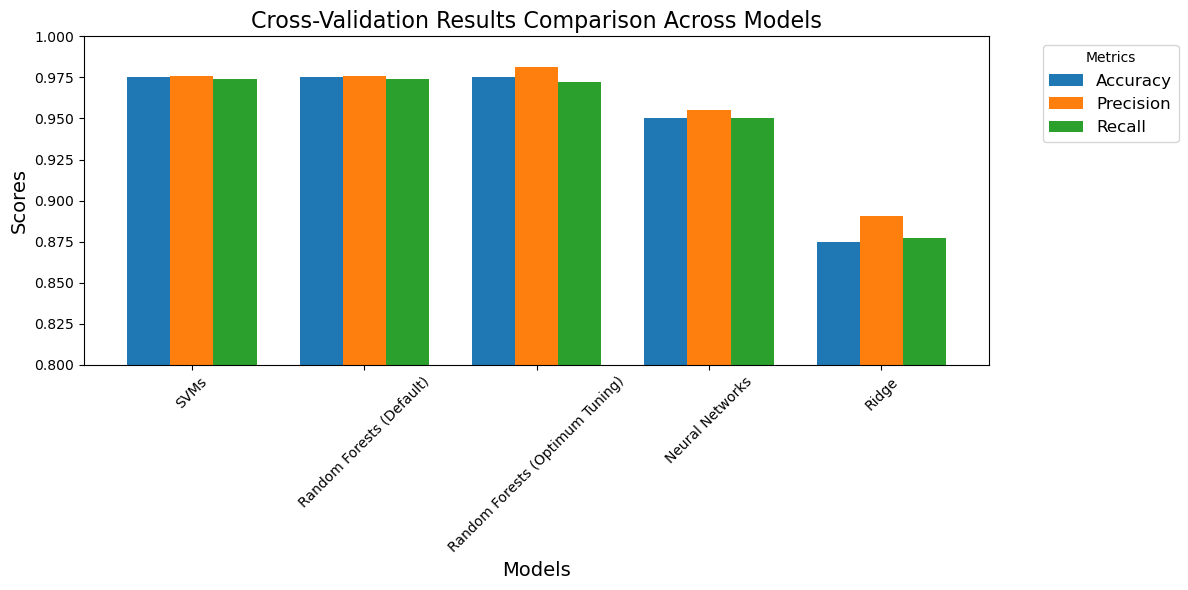

In [167]:
# Create a figure to display results across four methods
results_df.T.plot(kind="bar", figsize=(12, 6), width=0.75)

plt.title("Cross-Validation Results Comparison Across Models", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Scores", fontsize=14)
plt.legend(title="Metrics", fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0.8, 1.0)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

**Part 3: Summary and Recommendation**

Based on the comparison above, **Random Forests with my own optimum tuning** is the best method for predicting the data. It has the highest accuracy, precision, and recall, with low cross-validated error.

SVMs and Random Forests with default settings also show strong performance, although slightly lower than Random Forests with optimum tuning. Neural Networks and Ridge Regression are not recommended due to their relatively lower performance.